In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve








In [36]:
df_train=pd.read_csv('titanic_train.csv')
df_test=pd.read_csv('titanic_test.csv')

In [37]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


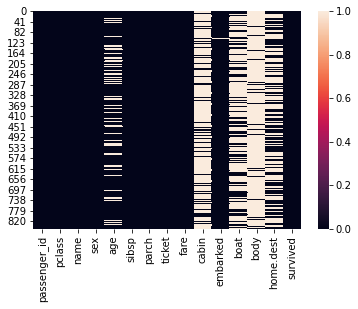

In [38]:
sns.heatmap(df_train.isnull())

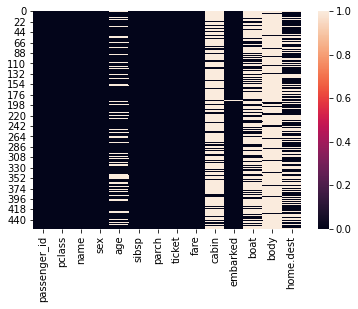

In [39]:
sns.heatmap(df_test.isnull())

In [40]:
df_train.shape,df_test.shape

((850, 15), (459, 14))

In [41]:
df_train.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [42]:
df_test.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age              89
sibsp             0
parch             0
ticket            0
fare              0
cabin           355
embarked          1
boat            281
body            411
home.dest       178
dtype: int64

In [43]:
df_train.nunique()

passenger_id    850
pclass            3
name            849
sex               2
age              88
sibsp             7
parch             8
ticket          660
fare            236
cabin           135
embarked          3
boat             26
body             73
home.dest       272
survived          2
dtype: int64

In [44]:
df_test.nunique()

passenger_id    459
pclass            3
name            459
sex               2
age              76
sibsp             7
parch             7
ticket          399
fare            186
cabin            88
embarked          3
boat             23
body             48
home.dest       190
dtype: int64

In [45]:
def nameTitle(text):
    text=text.split(',')[1].split()[0]
    return text

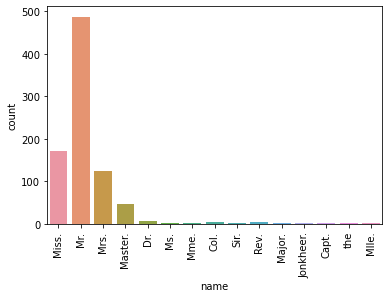

In [46]:
tmp=df_train['name'].apply(nameTitle)
sns.countplot(tmp)
pl.xticks(rotation=90)
pl.show()

In [47]:
df1=df_train.copy()
df1['Title']=df1['name'].apply(nameTitle)

In [48]:
df1.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

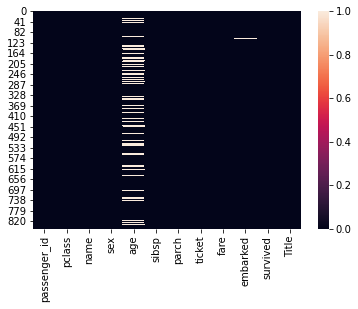

In [49]:
sns.heatmap(df1.isnull())

In [50]:
def ageHandle(age):
    if age >0 and age<=10:
        return 'child'
    elif age>10 and age<=20:
        return 'adolsense'
    elif age>20 and age<=35:
        return 'young'
    elif age>35 and age<=55:
        return 'Mid_aged'
    elif age>55:
        return 'Old_aged'
    else:
        return 'na'

df1['age']=df1['age'].apply(ageHandle)

In [51]:
df1.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,Title
0,1216,3,"Smyth, Miss. Julia",female,na,0,0,335432,7.7333,Q,1,Miss.
1,699,3,"Cacic, Mr. Luka",male,Mid_aged,0,0,315089,8.6625,S,0,Mr.
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,young,1,1,345773,24.1500,S,0,Mrs.
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,Mid_aged,1,3,29105,23.0000,S,1,Mrs.
4,576,2,"Veal, Mr. James",male,Mid_aged,0,0,28221,13.0000,S,0,Mr.


In [52]:
df1['sibsp'].unique()

array([0, 1, 2, 8, 5, 4, 3], dtype=int64)

In [53]:
df1['Title'].unique()

array(['Miss.', 'Mr.', 'Mrs.', 'Master.', 'Dr.', 'Ms.', 'Mme.', 'Col.',
       'Sir.', 'Rev.', 'Major.', 'Jonkheer.', 'Capt.', 'the', 'Mlle.'],
      dtype=object)

In [54]:
ages=df1['age'].tolist()
titles=df1['Title'].tolist()
count=0
for i in range(len(ages)):
    if ages[i]=='na':
        if titles[i]=='Miss.':
            ages[i]='young'
        elif titles[i]=='Mr.':
            ages[i]='young'
        elif titles[i]=='Mrs.':
            ages[i]='Mid_aged'
        elif titles[i]=='Master.' or titles[i]=='Dr.':
            ages[i]='Mid_aged'
        else:
            ages[i]='Old_aged'

In [55]:
df1['age'][df1['age']=='na'].value_counts()

na    174
Name: age, dtype: int64

In [56]:
df1.age=ages

In [57]:
df1.drop(['passenger_id','name','ticket'],axis=1,inplace=True)

In [58]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived,Title
0,3,female,young,0,0,7.7333,Q,1,Miss.
1,3,male,Mid_aged,0,0,8.6625,S,0,Mr.
2,3,female,young,1,1,24.1500,S,0,Mrs.
3,2,female,Mid_aged,1,3,23.0000,S,1,Mrs.
4,2,male,Mid_aged,0,0,13.0000,S,0,Mr.


In [59]:
survived=df1[df1['survived']==1]
nosurvived=df1[df1['survived']==0]

In [60]:
def plot_pie(column):
    temp1=go.Pie(values=survived[column].value_counts().values.tolist(),
                 labels=survived[column].value_counts().keys().tolist(),
                  domain  = dict(x = [0,.48]),
                 hole=.6,
                 name='Survived')
    temp2=go.Pie(values=nosurvived[column].value_counts().values.tolist(),
                 labels=nosurvived[column].value_counts().keys().tolist(),
                domain  = dict(x = [.52,1]),
                hole=.6,
                 name='Didnt Survive')
    layout = go.Layout(dict(title = column + " distribution in Survival rate ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Survived",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Not Survived",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    
    data=[temp1,temp2]
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
    
target_col=['survived','fare'] 
colz=[i for i in df1.columns if i not in target_col]
for i in colz:
    plot_pie(i)

In [61]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived,Title
0,3,female,young,0,0,7.7333,Q,1,Miss.
1,3,male,Mid_aged,0,0,8.6625,S,0,Mr.
2,3,female,young,1,1,24.1500,S,0,Mrs.
3,2,female,Mid_aged,1,3,23.0000,S,1,Mrs.
4,2,male,Mid_aged,0,0,13.0000,S,0,Mr.


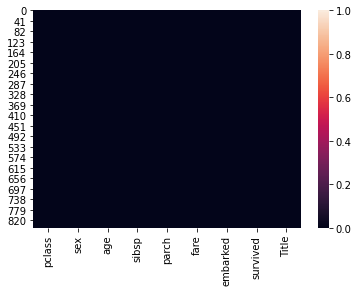

In [63]:
sns.heatmap(df1.isnull())

In [66]:
df1.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
Title       0
dtype: int64

In [65]:
df1.dropna(inplace=True)

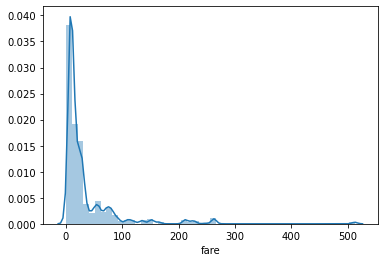

In [69]:
sns.distplot(df1['fare'])

In [76]:
survived_ages=survived['age'].value_counts().reset_index()
survived_ages.columns=['age','count']
nosurvived_ages=nosurvived['age'].value_counts().reset_index()
nosurvived_ages.columns=['age','count']


In [77]:
survived_ages

,age,count
0,young,147
1,Mid_aged,78
2,adolsense,42
3,child,35
4,Old_aged,11


In [79]:
temp1=go.Bar(x=survived_ages['age'],
            y=survived_ages['count'],
            name='Survived')

temp2=go.Bar(x=nosurvived_ages['age'],
            y=nosurvived_ages['count'],
            name='Didnt Survived')
layout=go.Layout(dict(title='Survival and non Survival Ages',
                     plot_bgcolor='rgb(243,243,243)'))
data=[temp1,temp2]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

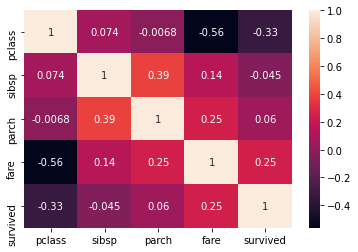

In [82]:
sns.heatmap(df1.corr(),annot=True)

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df1['sex']=le.fit_transform(df1['sex'])

In [88]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived,Title
0,3,0,young,0,0,7.7333,Q,1,Miss.
1,3,1,Mid_aged,0,0,8.6625,S,0,Mr.
2,3,0,young,1,1,24.1500,S,0,Mrs.
3,2,0,Mid_aged,1,3,23.0000,S,1,Mrs.
4,2,1,Mid_aged,0,0,13.0000,S,0,Mr.


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    848 non-null    int64  
 1   sex       848 non-null    int32  
 2   age       848 non-null    object 
 3   sibsp     848 non-null    int64  
 4   parch     848 non-null    int64  
 5   fare      848 non-null    float64
 6   embarked  848 non-null    object 
 7   survived  848 non-null    int64  
 8   Title     848 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 62.9+ KB


In [93]:
df1.nunique()

pclass        3
sex           2
age           5
sibsp         7
parch         8
fare        235
embarked      3
survived      2
Title        15
dtype: int64

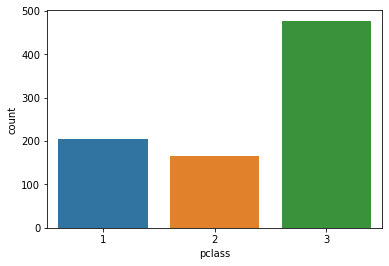

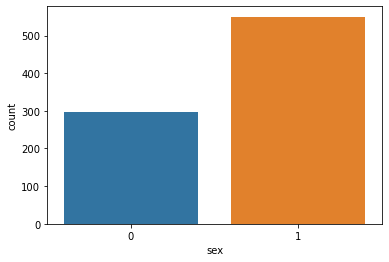

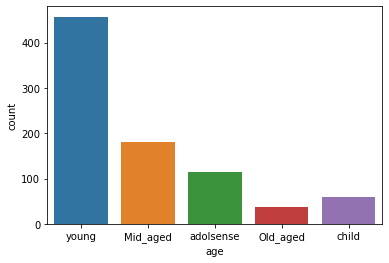

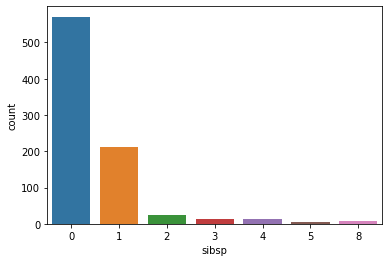

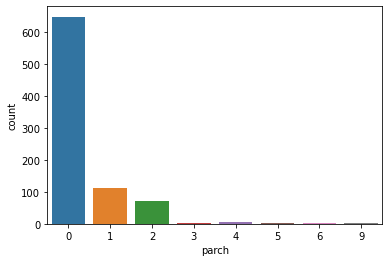

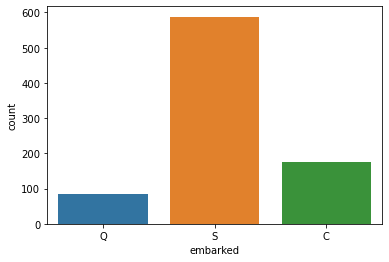

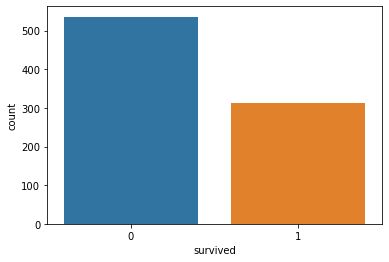

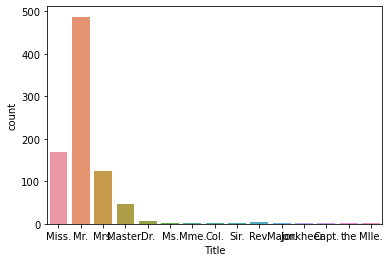

In [95]:
for i in df1.columns:
    if i !='fare':
        sns.countplot(df1[i])
        pl.show()

In [96]:
df2=pd.get_dummies(df1)

In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [107]:
target_col=['survived']
X=df2[[i for i in df2.columns if i not in target_col]]
y=df2['survived']

In [108]:
principal_components=pca.fit_transform(X)

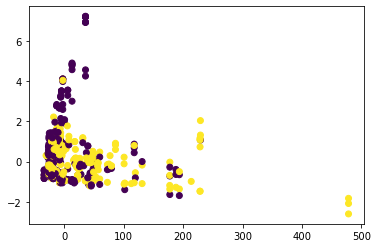

In [113]:
pl.scatter(principal_components[:,0],principal_components[:,1],c=y)

In [287]:
df_check=pd.DataFrame({'Index':[],'Train_Score':[],'Test_Score':[]})

In [288]:
df_check

,Index,Train_Score,Test_Score


In [289]:
for i in range(500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    lg=LogisticRegression(C=1,max_iter=100000)
    lg.fit(X_train,y_train)
    a=pd.DataFrame({'Index':i,'Train_Score':[lg.score(X_train,y_train)],
            'Test_Score':[lg.score(X_test,y_test)]})
    df_check=pd.concat([df_check,a])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [290]:
df_check=df_check.sort_values('Train_Score',ascending=False)

In [293]:
temp=df_check[df_check['Train_Score']>0.8]
temp=temp[temp['Test_Score']>0.82]

In [294]:
temp.sort_values('Train_Score',ascending=False)

,Index,Train_Score,Test_Score
0,231.0,0.831761,0.825472
0,334.0,0.831761,0.820755
0,126.0,0.831761,0.820755
0,240.0,0.830189,0.830189
0,313.0,0.830189,0.820755
...,...,...,...
0,291.0,0.808176,0.863208
0,66.0,0.808176,0.849057
0,344.0,0.808176,0.863208
0,202.0,0.808176,0.853774


In [303]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=313)

<IPython.core.display.Javascript object>

In [304]:
from sklearn.linear_model import LogisticRegression

In [305]:
lg=LogisticRegression(C=1,max_iter=1000)

In [306]:
lg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000)

In [307]:
lg.score(X_train,y_train),lg.score(X_test,y_test)

(0.8301886792452831, 0.8207547169811321)

In [325]:
def prediction(algorithm,training_x,testing_x,training_y,
              testing_y,cols,cf,thresold_plot):
    algorithm.fit(training_x,training_y)
    predictios=algorithm.predict(testing_x)
    probablities=algorithm.predict_proba(testing_x)
    if cf=='coef':
        coeffs=pd.DataFrame(algorithm.coef_.ravel())
    elif cf=='feat':
        coeffs=pd.DataFrame(algorithm.feature_importances_)
    column_df=pd.DataFrame(X_train.columns)
    coef_summary=(pd.merge(coeffs,column_df,left_index=True,
                          right_index=True))
    
    coef_summary.columns=['coefficients','features']
    coef_summary=coef_summary.sort_values('coefficients',ascending=False)
    print(algorithm)
    
    print('\n Classification report: \n',classification_report(testing_y,predictios))
    
    print('\n Accuracy Score: \n',accuracy_score(testing_y,predictios))

    print('\n Confusion Matrix: \n')
    conf_matrix=confusion_matrix(testing_y,predictios)
    print(conf_matrix)
    
    
    model_roc_auc=roc_auc_score(testing_y,predictios)
    print('\n Area Under Curve:',model_roc_auc,'\n')
    fpr,tpr,thresold=roc_curve(testing_y,probablities[:,1])

    
    
#     
    
lg=LogisticRegression()    
prediction(lg,X_train,X_test,y_train,y_test,None,'coef',None)

LogisticRegression()

 Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       138
           1       0.74      0.77      0.75        74

    accuracy                           0.83       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.83      0.83      0.83       212


 Accuracy Score: 
 0.8254716981132075

 Confusion Matrix: 

[[118  20]
 [ 17  57]]

 Area Under Curve: 0.8126713670191931 

[[0.1632835  0.8367165 ]
 [0.90237579 0.09762421]
 [0.90019719 0.09980281]
 [0.1376552  0.8623448 ]
 [0.90230806 0.09769194]
 [0.67621348 0.32378652]
 [0.11536575 0.88463425]
 [0.90240317 0.09759683]
 [0.90240317 0.09759683]
 [0.73142358 0.26857642]
 [0.89717627 0.10282373]
 [0.9023614  0.0976386 ]
 [0.9023614  0.0976386 ]
 [0.88421645 0.11578355]
 [0.89718402 0.10281598]
 [0.84902227 0.15097773]
 [0.94337977 0.05662023]
 [0.90019867 0.09980133]
 [0.32504154 0.67495846]
 [0.85982922 0.14017078]
